## Reading, Writing and Displaying the images

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

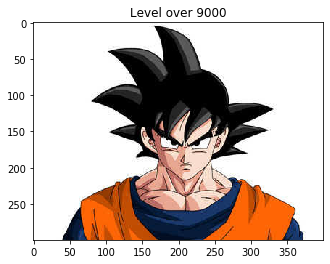

In [2]:
# cv2.cvtColor(img, mode), helps in coverting an image from one channel
# to another
img = cv.imread('goku.jpeg')
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title("Level over 9000")
plt.show()

In [3]:
## Let's see what is the dimension of this image
img.shape

(300, 400, 3)

In [4]:
## saving up the images
cv.imwrite('over_9000.jpg', img)

True

## Grayscaling

Converting RGB images to Gray images

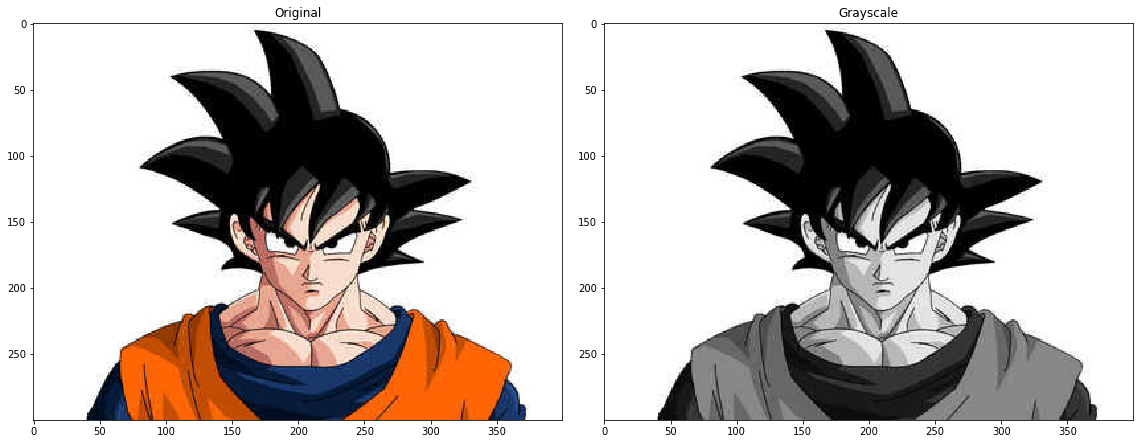

In [5]:
# Converting into a grayscale image
gray_image = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

fig, ax = plt.subplots(1, 2, figsize=(16, 8))
fig.tight_layout()

ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[0].set_title("Original")

ax[1].imshow(cv.cvtColor(gray_image, cv.COLOR_BGR2RGB))
ax[1].set_title("Grayscale")
plt.show()

In [6]:
cv.imwrite('Grayscale_Goku.jpg', gray_image)

True

# HSV colors

Text(0.5, 1, 'Value channel')

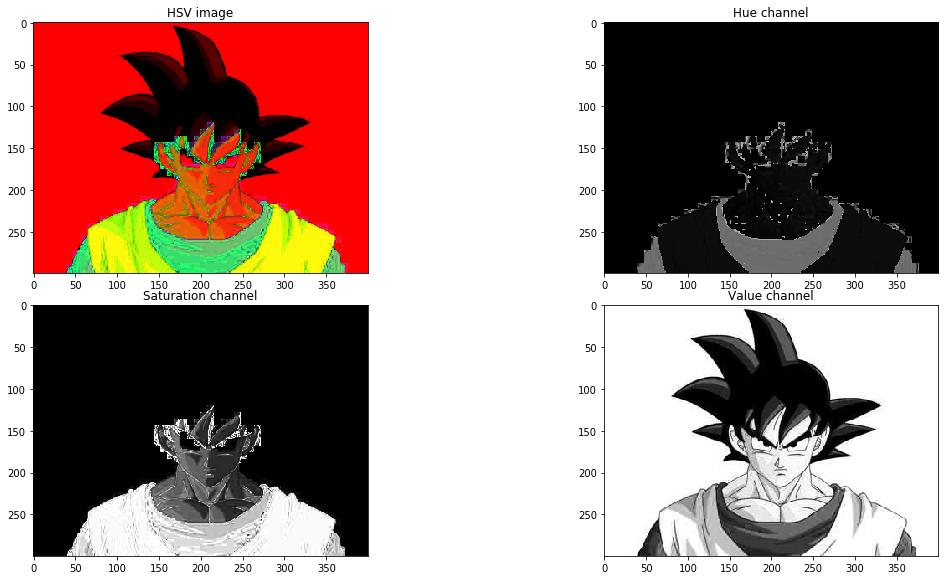

In [7]:
hsv_image = cv.cvtColor(img, cv.COLOR_BGR2HSV)

fig, ax = plt.subplots(2, 2, figsize=(16, 8))
fig.tight_layout()

ax[0][0].imshow(cv.cvtColor(hsv_image, cv.COLOR_BGR2RGB))
ax[0][0].set_title("HSV image")

ax[0][1].imshow(cv.cvtColor(hsv_image[:, :, 0], cv.COLOR_BGR2RGB))
ax[0][1].set_title("Hue channel")

ax[1][0].imshow(cv.cvtColor(hsv_image[:, :, 1], cv.COLOR_BGR2RGB))
ax[1][0].set_title("Saturation channel")

ax[1][1].imshow(cv.cvtColor(hsv_image[:, :, 2], cv.COLOR_BGR2RGB))
ax[1][1].set_title("Value channel")

In [8]:
cv.imwrite('hsv_image.jpg', hsv_image)
cv.imwrite('hue channel.jpg', hsv_image[:, :, 0])
cv.imwrite('Saturation_channel.jpg', hsv_image[:, :, 1])
cv.imwrite('value_channel.jpg', hsv_image[:, :, 2])

True

## Merging and amplifying

In [9]:
# Selecting a random channel in our image

b, g, r = img[10, 20]
print(b, g, r)
print(img.shape)

255 255 255
(300, 400, 3)


In [10]:
grayed = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

print(grayed.shape)
print(grayed[10, 20])

(300, 400)
255


So grayscale pictures have only two channels

## Let's split the each color pixel with the cv2's `split` function

Text(0.5, 1, 'Blue')

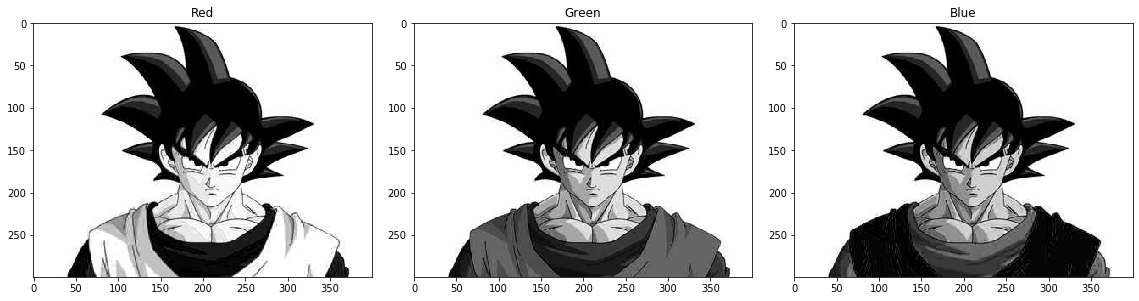

In [11]:
b, g, r = cv.split(img)

fig, ax = plt.subplots(1, 3, figsize=(16, 8))
fig.tight_layout()

ax[0].imshow(cv.cvtColor(r, cv.COLOR_BGR2RGB))
ax[0].set_title("Red")

ax[1].imshow(cv.cvtColor(g, cv.COLOR_BGR2RGB))
ax[1].set_title("Green")

ax[2].imshow(cv.cvtColor(b, cv.COLOR_BGR2RGB))
ax[2].set_title("Blue")

### Merging

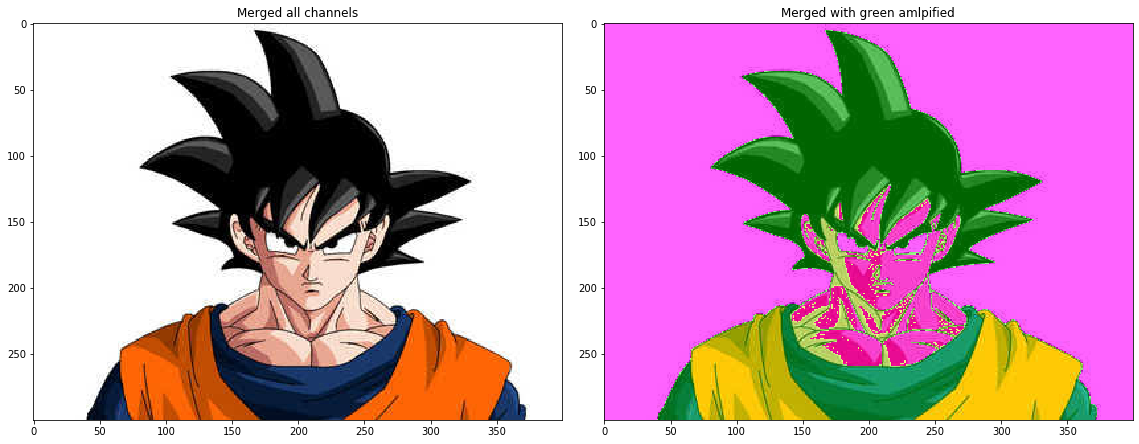

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
fig.tight_layout()


merged = cv.merge([b, g, r])
ax[0].imshow(cv.cvtColor(merged, cv.COLOR_BGR2RGB))
ax[0].set_title("Merged all channels")

amplified = cv.merge([b, g+100, r])
ax[1].imshow(cv.cvtColor(amplified, cv.COLOR_BGR2RGB))
ax[1].set_title("Merged with green amlpified")

plt.show()

In [13]:
cv.imwrite("Merged with green amlpified.jpg", amplified)

True

## Penalizing two channels for making the pic green, blue or red

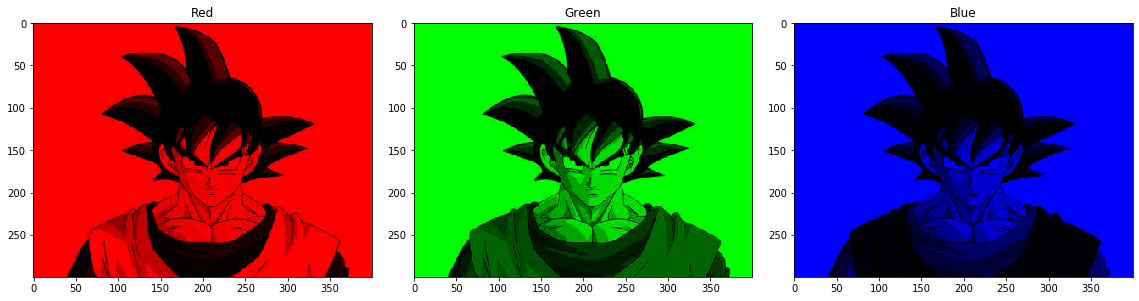

In [14]:
# Splitting the BGR values from the image
b, g, r = cv.split(img)

zeros = np.zeros(img.shape[:2], dtype="uint8")

fig, ax = plt.subplots(1, 3, figsize=(16, 8))
fig.tight_layout()

red = cv.merge([r, zeros, zeros])
green = cv.merge([zeros, g, zeros])
blue = cv.merge([zeros, zeros, b])

ax[0].imshow(red)
ax[0].set_title("Red")

ax[1].imshow(green)
ax[1].set_title("Green")

ax[2].imshow(blue)
ax[2].set_title("Blue")

plt.show()

In [15]:
cv.imwrite("Red.jpg", red)
cv.imwrite("green.jpg", green)
cv.imwrite("blue.jpg", blue)

True

## Histogram

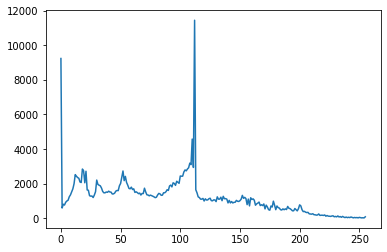

In [16]:
img = cv.imread('vegeta.jpeg')
hist = cv.calcHist([img], [0], None, [256], [0, 256])

plt.plot(hist)

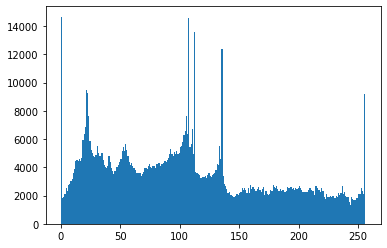

In [17]:
plt.hist(img.ravel(), 256, [0, 256])
plt.show()

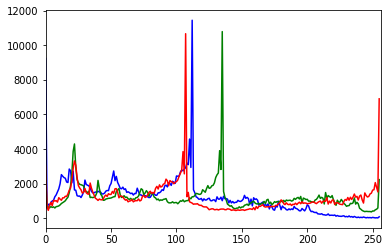

In [18]:
## Seperating red, blue, and green colors

colors = (list('bgr'))

for i, col in enumerate(colors):
    hist2 = cv.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(hist2, color=col)
    plt.xlim([0,256])

plt.show()

Text(0.5, 1, 'Original colors')

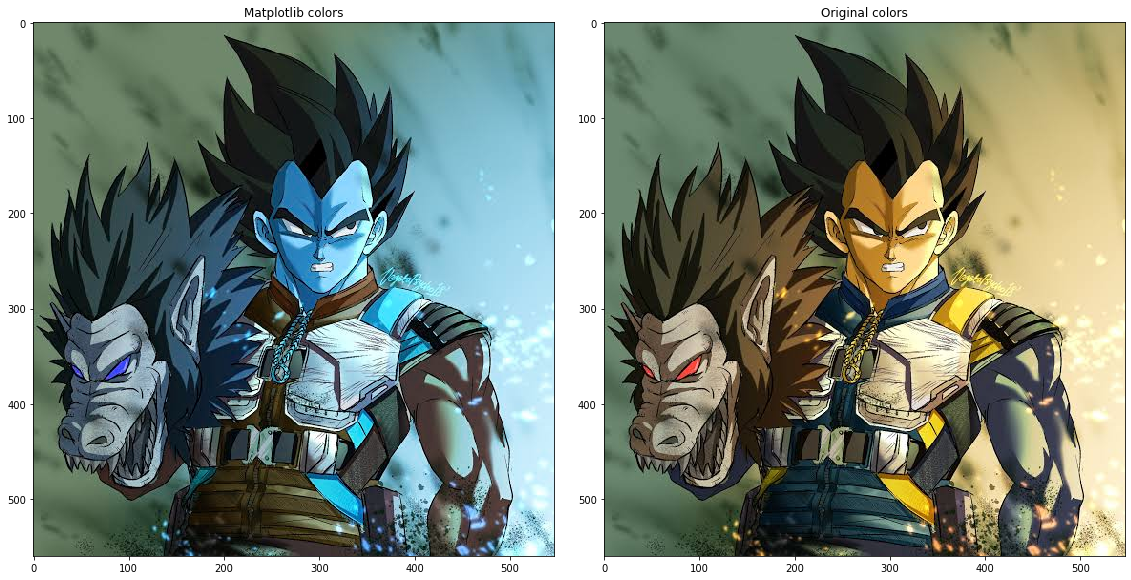

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
fig.tight_layout()

ax[0].imshow(img)
ax[0].set_title("Matplotlib colors")

ax[1].imshow(cv.cvtColor(img, cv.COLOR_RGB2BGR))
ax[1].set_title("Original colors")

Text(0.5, 1, 'Original colors')

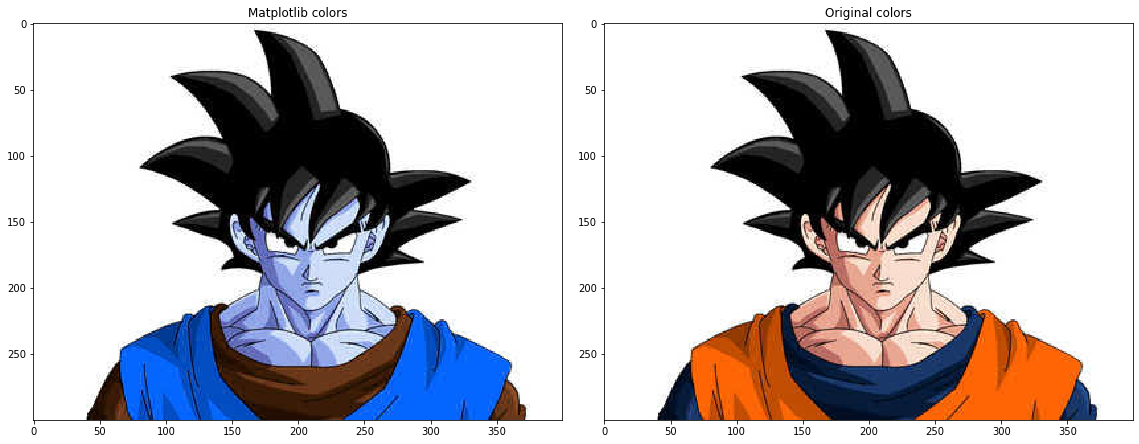

In [20]:
## For goku, casue I like him :)

img = cv.imread('goku.jpeg')

fig, ax = plt.subplots(1, 2, figsize=(16, 8))
fig.tight_layout()

ax[0].imshow(img)
ax[0].set_title("Matplotlib colors")

ax[1].imshow(cv.cvtColor(img, cv.COLOR_RGB2BGR))
ax[1].set_title("Original colors")

## Drawing with OpenCV

Text(0.5, 1.0, 'RGB colors')

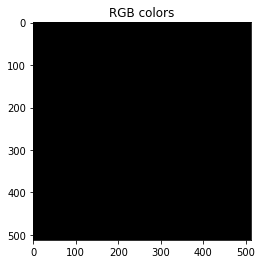

In [21]:
# Black image
image = np.zeros((512, 512, 3), np.uint8)

plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title("RGB colors")

Text(0.5, 1.0, 'Black and white')

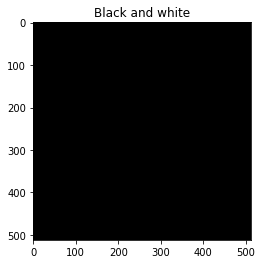

In [22]:
image_bw = np.zeros((512, 512), np.uint8)
plt.imshow(cv.cvtColor(image_bw, cv.COLOR_RGB2BGR))
plt.title("Black and white")

## Drawing a line

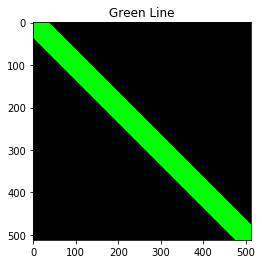

In [23]:
# line(img, pt1, pt2, color[, thickness[, lineType[, shift]]]) -> img
point1 = (0, 0)
point2 = (511, 511)
# Green
color = (0, 256, 0)
# 10 pixels
thickness = 50


cv.line(image, point1, point2, color, thickness)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title("Green Line")
plt.show()

## Drawing a rectangle

Text(0.5, 1.0, 'Rectangle')

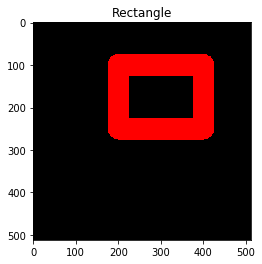

In [24]:
image = np.zeros((512, 512, 3), np.uint8)

cv.rectangle(image, (200, 100), (400, 250), (0, 0, 256), 50)
plt.imshow(cv.cvtColor(image, cv.COLOR_RGB2BGR))
plt.title("Rectangle")

Text(0.5, 1, 'Polygon')

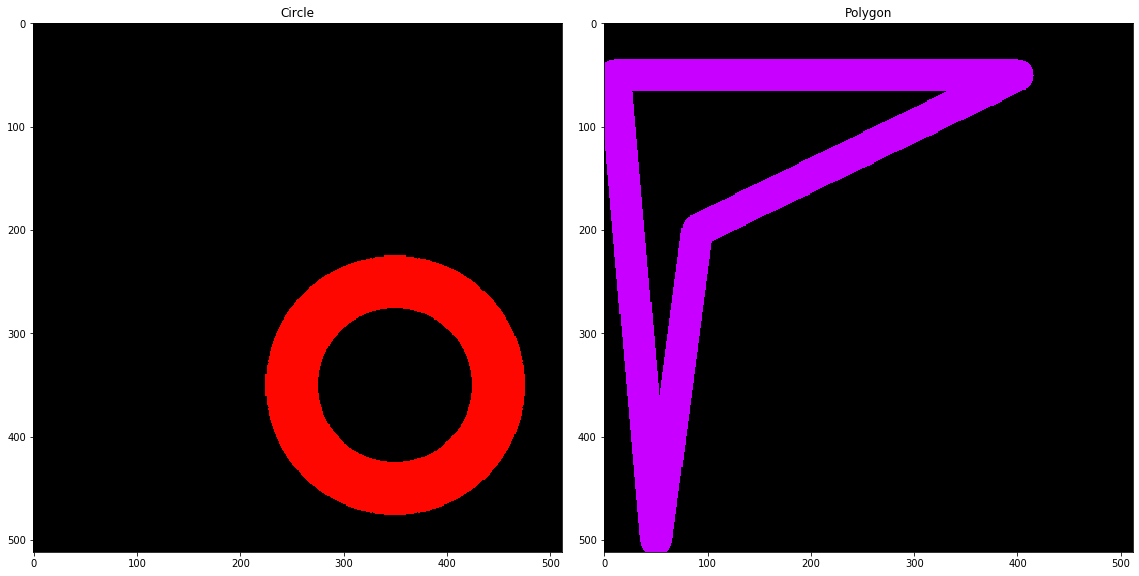

In [25]:
image = np.zeros((512, 512, 3), np.uint8)
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
fig.tight_layout()
cv.circle(image, (350, 350), 100, (1,7,255), 50)
ax[0].imshow(cv.cvtColor(image, cv.COLOR_RGB2BGR))
ax[0].set_title("Circle")


image = np.zeros((512, 512, 3), np.uint8)
points = np.array([[10,50], [400,50], [90,200], [50,500]], np.int32)
points = points.reshape((-1, 1, 2))
cv.polylines(image, [points], True, (255, 0, 200), 30)
ax[1].imshow(cv.cvtColor(image, cv.COLOR_RGB2BGR))
ax[1].set_title("Polygon")

## Putting text

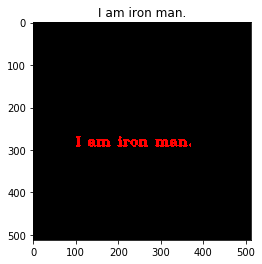

In [26]:
image = np.zeros((512, 512, 3), np.uint8)

cv.putText(image, "I am iron man.", (100,290), cv.FONT_HERSHEY_TRIPLEX, 1, (0, 0, 256), 3)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title("I am iron man.")
plt.show()

In [27]:
cv.imwrite("I am Iron Man.jpg", image)

True